In [187]:
using MarketData
start = DateTime(2013, 1, 1)

GILD = yahoo(:GILD, YahooOpt(period1 = start))[:, :Close]
VRTX = yahoo(:VRTX, YahooOpt(period1 = start))[:, :Close]
REGN = yahoo(:REGN, YahooOpt(period1 = start))[:, :Close]
AMGN = yahoo(:AMGN, YahooOpt(period1 = start))[:, :Close]
BMY = yahoo(:BMY, YahooOpt(period1 = start))[:, :Close]
NASDAQ = yahoo("^IXIC", YahooOpt(period1 = start))[:, :Close]

2859×1 TimeArray{Float64, 2, Date, Matrix{Float64}} 2013-01-02 to 2024-05-10
┌────────────┬─────────┐
│            │ Close   │
├────────────┼─────────┤
│ 2013-01-02 │ 3112.26 │
│ 2013-01-03 │ 3100.57 │
│ 2013-01-04 │ 3101.66 │
│ 2013-01-07 │ 3098.81 │
│ 2013-01-08 │ 3091.81 │
│ 2013-01-09 │ 3105.81 │
│ 2013-01-10 │ 3121.76 │
│ 2013-01-11 │ 3125.63 │
│ 2013-01-14 │  3117.5 │
│ 2013-01-15 │ 3110.78 │
│ 2013-01-16 │ 3117.54 │
│     ⋮      │    ⋮    │
│ 2024-04-29 │ 15983.1 │
│ 2024-04-30 │ 15657.8 │
│ 2024-05-01 │ 15605.5 │
│ 2024-05-02 │ 15841.0 │
│ 2024-05-03 │ 16156.3 │
│ 2024-05-06 │ 16349.2 │
│ 2024-05-07 │ 16332.6 │
│ 2024-05-08 │ 16302.8 │
│ 2024-05-09 │ 16346.3 │
│ 2024-05-10 │ 16340.9 │
└────────────┴─────────┘
       2838 rows omitted

In [46]:
#Closing Price P series Vector

P_t_GILD = values(GILD)
P_t_VRTX = values(VRTX)
P_t_REGN = values(REGN)
P_t_AMGN = values(AMGN)
P_t_BMY = values(BMY)
P_t_NASDAQ = values(NASDAQ)

2859×1 Matrix{Float64}:
  3112.26001
  3100.570068
  3101.659912
  3098.810059
  3091.810059
  3105.810059
  3121.76001
  3125.629883
  3117.5
  3110.780029
  3117.540039
  3136.0
  3134.709961
     ⋮
 15611.759766
 15927.900391
 15983.080078
 15657.820313
 15605.480469
 15840.959961
 16156.330078
 16349.25
 16332.55957
 16302.759766
 16346.259766
 16340.870117

In [208]:
#Return R_t Vector

R_t_GILD = log.([P_t_GILD[i] / P_t_GILD[i-1] for i in 2:length(P_t_GILD)])
R_t_VRTX = log.([P_t_VRTX[i] / P_t_VRTX[i-1] for i in 2:length(P_t_VRTX)])
R_t_REGN = log.([P_t_REGN[i] / P_t_REGN[i-1] for i in 2:length(P_t_REGN)])
R_t_AMGN = log.([P_t_AMGN[i] / P_t_AMGN[i-1] for i in 2:length(P_t_AMGN)])
R_t_BMY = log.([P_t_BMY[i] / P_t_BMY[i-1] for i in 2:length(P_t_BMY)])
R_t_NASDAQ = log.([P_t_NASDAQ[i] / P_t_NASDAQ[i-1] for i in 2:length(P_t_NASDAQ)])

2858-element Vector{Float64}:
 -0.003763166109083031
  0.0003514361817382637
 -0.0009192378042328959
 -0.002261486846205087
  0.00451787090736594
  0.00512237861600736
  0.0012388768945886654
 -0.0026044268653068236
 -0.0021578906460000486
  0.0021707338674550073
  0.005903860694652129
 -0.00041144911061826713
  0.0026983512879602298
  ⋮
 -0.006448023267410977
  0.0200478516168282
  0.003458354534129358
 -0.020560174883680976
 -0.0033483280133961867
  0.014976823473216716
  0.019712940019932238
  0.011870096563124334
 -0.0010213896764350427
 -0.0018262307762550516
  0.002664706405486759
 -0.00032977193581293926

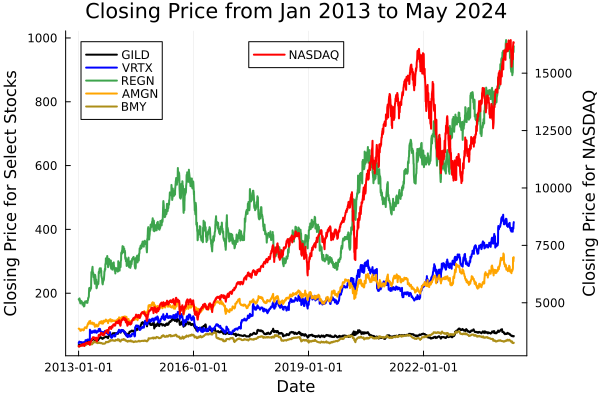

In [228]:
using Plots
using TimeSeries

dates = timestamp(NASDAQ)

plot(GILD,label = "GILD", legend=:topleft, l=2, xlabel = "Date", ylabel = "Closing Price for Select Stocks", linecolor=:black)
plot!(title = "Closing Price from Jan 2013 to May 2024")
plot!(VRTX, label = "VRTX", linecolor=:blue, l=2)
plot!(REGN, label = "REGN", l=2)
plot!(AMGN, label = "AMGN", l=2, linecolor=:orange)
plot!(BMY, label = "BMY", l=2)
plot!(twinx(), NASDAQ, label = "NASDAQ", legend =:top, ylabel = "Closing Price for NASDAQ", linecolor=:red, l=2)

In [217]:
R_t = hcat(R_t_GILD, R_t_VRTX, R_t_REGN, R_t_AMGN, R_t_BMY, R_t_NASDAQ)

2858×6 Matrix{Float64}:
 -0.0014666    0.033787     -0.0027078    …   0.0160732    -0.00376317
  0.0102212    0.0153848     0.00199016       0.00330368    0.000351436
  0.0152034    0.0309237     0.0080308        0.00149825   -0.000919238
  0.00674107   0.0252649    -0.0328574        0.00269099   -0.00226149
  0.00605399  -0.00516797    0.0376123        0.00565724    0.00451787
  0.00089853  -0.0305126     0.00201547   …   0.0120999     0.00512238
  0.00179464   0.0108385    -0.0237326        0.00117271    0.00123888
 -0.00397827   0.000633893  -0.000334465      0.00263351   -0.00260443
 -0.00528585  -0.00550728   -0.0257467        0.00233503   -0.00215789
 -0.0024591   -0.0134718    -0.0278964        0.000874341   0.00217073
  0.00465418   0.00729304   -0.00259115   …  -0.00174933    0.00590386
  0.00962718  -0.0103116    -0.00959834       0.00552887   -0.000411449
 -0.00473775   0.0162779     0.0414005        0.0112539     0.00269835
  ⋮                                       ⋱       

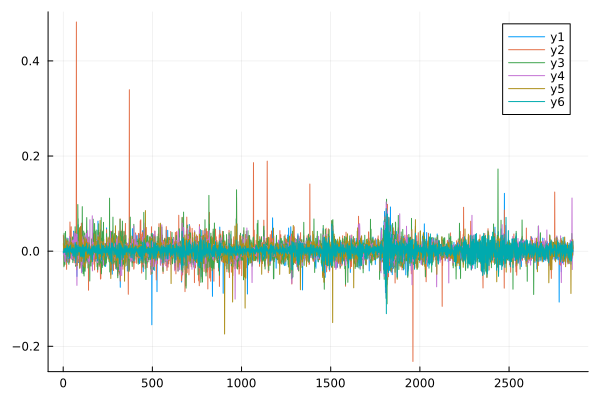

In [226]:
plot(R_t)

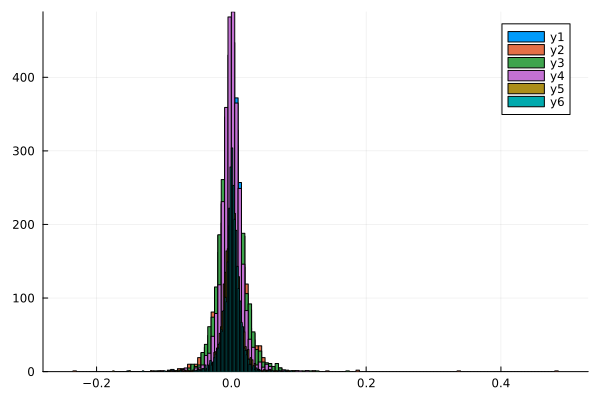

In [230]:
histogram(R_t)
dates = timestamp(NASDAQ))

In [229]:
dates = timestamp(NASDAQ)

2859-element Vector{Date}:
 2013-01-02
 2013-01-03
 2013-01-04
 2013-01-07
 2013-01-08
 2013-01-09
 2013-01-10
 2013-01-11
 2013-01-14
 2013-01-15
 2013-01-16
 2013-01-17
 2013-01-18
 ⋮
 2024-04-25
 2024-04-26
 2024-04-29
 2024-04-30
 2024-05-01
 2024-05-02
 2024-05-03
 2024-05-06
 2024-05-07
 2024-05-08
 2024-05-09
 2024-05-10

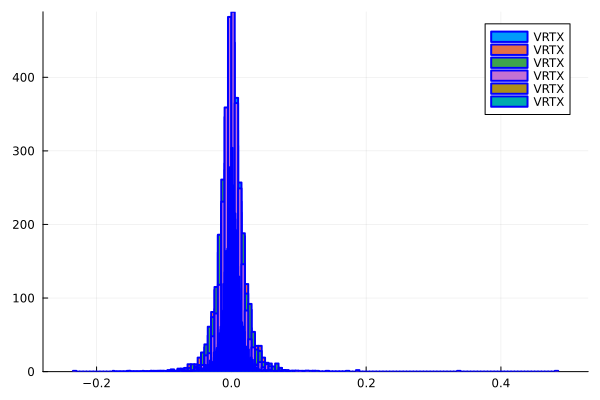

In [236]:
histogram(R_t, label = "VRTX", linecolor=:blue, l=2)

In [237]:
GILD = yahoo(:GILD, YahooOpt(period1 = start))

2860×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2013-01-02 to 2024-05-13
┌────────────┬────────┬────────┬────────┬────────┬──────────┬───────────┐
│            │ Open   │ High   │ Low    │ Close  │ AdjClose │ Volume    │
├────────────┼────────┼────────┼────────┼────────┼──────────┼───────────┤
│ 2013-01-02 │ 37.155 │  37.53 │ 36.935 │  37.53 │  27.6154 │  7.9418e6 │
│ 2013-01-03 │ 37.555 │ 37.925 │  37.37 │ 37.475 │  27.5749 │  5.9654e6 │
│ 2013-01-04 │   37.6 │ 38.025 │ 37.425 │  37.86 │  27.8582 │  7.1262e6 │
│ 2013-01-07 │ 38.445 │  38.54 │   38.1 │  38.44 │   28.285 │  7.9484e6 │
│ 2013-01-08 │  38.41 │ 39.205 │ 38.405 │   38.7 │  28.4763 │ 1.33714e7 │
│ 2013-01-09 │  38.73 │  38.94 │  38.46 │ 38.935 │  28.6492 │  8.2574e6 │
│ 2013-01-10 │ 39.045 │ 39.295 │  38.48 │  38.97 │   28.675 │   8.277e6 │
│ 2013-01-11 │ 39.045 │ 39.235 │  38.68 │  39.04 │  28.7265 │  8.2624e6 │
│ 2013-01-14 │  39.22 │  39.25 │ 38.745 │ 38.885 │  28.6124 │  9.1622e6 │
│ 2013-01-15 │ 38.705 │ 39.175 │  3